In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=2
paper='2004.04168'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Alright, let's break down this Hamiltonian step by step:

1. The Hamiltonian has several terms:
   - Kinetic term (H_Kinetic): $\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$
   - Hartree term (H_Hartree): $H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$
   - Fock term (H_Fock): $H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$

2. The dispersion relation is given by $E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$, where $t_s(n)$ is the hopping parameter for the $n$-th neighbor.

3. The interaction potential is given by $U(k) = \sum_{n} U(n) e^{-i k \cdot n}$, where $U(n)$ is the interaction strength for the $n$-th neighbor. Specifically, $U(0)$ is the on-site interaction and $U(1)$ is the nearest-neighbor interaction.

4. The hopping 

In [7]:
print(generated_code['thinking'])

Alright, let's break down this Hamiltonian step by step:

1. The Hamiltonian has several terms:
   - Kinetic term (H_Kinetic): $\hat{H}_{Kinetic} = \sum_{s, k} E_s(k) c^\dagger_s(k) c_s(k)$
   - Hartree term (H_Hartree): $H_{\text{Hartree}} = \frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$
   - Fock term (H_Fock): $H_{\text{Fock}} = -\frac{1}{N} \sum_{s, s'} \sum_{k_1, k_2} U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$

2. The dispersion relation is given by $E_s(k)=\sum_{n} t_s(n) e^{-i k \cdot n}$, where $t_s(n)$ is the hopping parameter for the $n$-th neighbor.

3. The interaction potential is given by $U(k) = \sum_{n} U(n) e^{-i k \cdot n}$, where $U(n)$ is the interaction strength for the $n$-th neighbor. Specifically, $U(0)$ is the on-site interaction and $U(1)$ is the nearest-neighbor interaction.

4. The hopping parameters are given as $t_1 = 6 \text{ meV}$ for nea

In [8]:
print(generated_code['text'])

# Answer

1) Number of Flavors, D = (2,)
Basis Order:
0: spin. Order: spin_up, spin_down

2) EXP-VAL DEPENDENT TERMS: {
   "$\langle c_s^\dagger(k_1) c_s(k_1) \rangle$": "Mean of `exp_val[s, s, :]`",
   "$\langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle$": "`exp_val[s, s', k1_idx]`"
}

TERMS:
- $E_s(k) c^\dagger_s(k) c_s(k)$ -> H[s, s, k], NI
- $U(0) \langle c_s^\dagger(k_1) c_s(k_1) \rangle c_{s'}^\dagger(k_2) c_{s'}(k_2)$ -> H[s', s', k_2], I (Hartree term)
- $-U(k_1 - k_2) \langle c_s^\dagger(k_1) c_{s'}(k_1) \rangle c_{s'}^\dagger(k_2) c_s(k_2)$ -> H[s, s', k_2], I (Fock term)

3) CODE:
```python
import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a triangular lattice with spin-dependent hopping and interactions.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary containing model parameters:
            - t1: Nearest-neighbor hopping para

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a triangular lattice with spin-dependent hopping and interactions.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary containing model parameters:
            - t1: Nearest-neighbor hopping parameter (default: 6.0 meV)
            - t2: Next-nearest-neighbor hopping parameter (default: 1.0 meV)
            - U0: On-site interaction strength (default: 1.0)
            - U1: Nearest-neighbor interaction strength (default: 0.5)
            - T: Temperature (default: 0)
            - a: Lattice constant (default: 1.0)
        filling_factor (float): Filling factor for the system, between 0 and 1.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={'t1': 6.0, 't2': 1.0, 'U0': 1.0, 'U1': 0.5, 'T': 0.0, 'a': 1.0}, filling_factor: float=0.5):
        self.lattice = 'triangul

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2004_04168_2.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

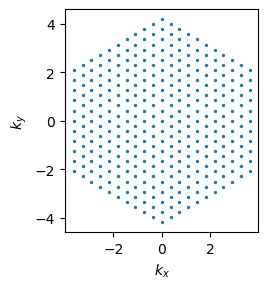

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

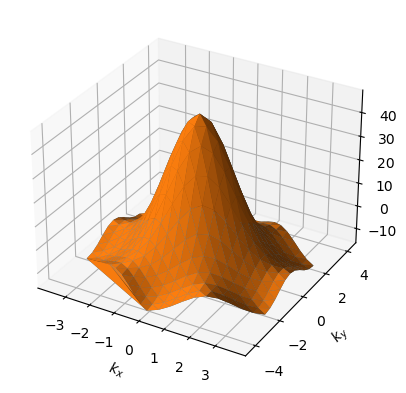

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

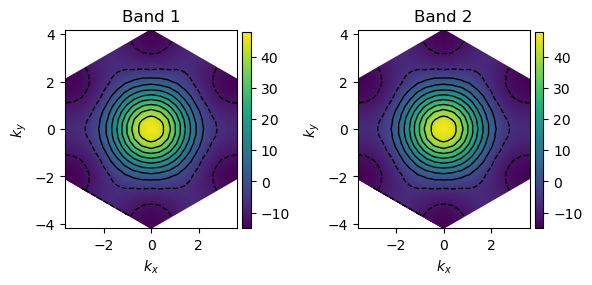

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, parameters={'U_0': 1e-5},filling_factor=0.5)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,0.5,0)

In [25]:
wf_int, en_int, exp_val= HF.solve(ham_int,1e-10*exp_val,100)

Convergence reached at iteration 1


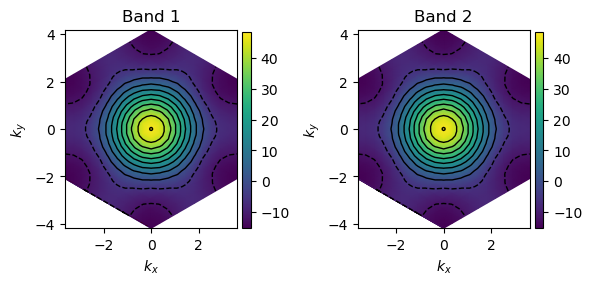

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, parameters={'U_0': 1e5},filling_factor=0.5)

In [28]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 2


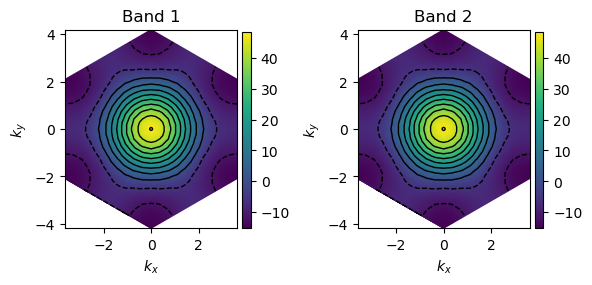

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int)

Gap is -63.76
U/T is 0.08
mean_U is 0.49


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image in relation to the problem and rubric.

From the rubric, I need to check:
1. If the image shows a momentum space mesh in the first Brillouin zone of the problem
2. The point group symmetry of the mesh

From the problem, I know:
- We're dealing with a triangular lattice
- The system is being analyzed using the Hartree-Fock method
- The Hamiltonian includes kinetic, Hartree, and Fock terms
- Only on-site and nearest neighbor interactions are considered

Now, let's analyze the image:

The image shows a hexagonal arrangement of points in k-space, with k_x on the horizontal axis and k_y on the vertical axis. The points span approximately from -4 to 4 in both directions, forming a hexagonal pattern.

First, let me check if this represents the first Brillouin zone of a triangular lattice:

For a triangular lattice, the first Brillouin zone is a hexagon in reciprocal space. This is consistent with what I see in the i

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the band structure plots shown in the image according to the rubric provided.

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, I can see that both plots (Band 1 and Band 2) show a hexagonal boundary for the Brillouin zone. This is indeed the expected shape for a triangular lattice in reciprocal space. The Brillouin zone of a triangular lattice should be a regular hexagon, which is what we see in these plots. So this criterion is met.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow)
In both Band 1 and Band 2 plots, the highest energy regions (shown in yellow) are at the center of the Brillouin zone, around the point (0,0), which would correspond to the Γ point in the standard notation for high-symmetry points in the Brillouin zone.



In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0, nu=1/2)
    )


#################### THINKING ####################

Let me analyze the image provided in the context of the problem statement and the rubric. I'll go through the rubric step by step to determine if the band structure plots shown meet the requirements.

The image shows two false color plots labeled "Band 1" and "Band 2", which appear to be the energy bands in the first Brillouin zone after a self-consistent Hartree-Fock calculation.

Let's go through the rubric:

### 1. Brillouin Zone Shape
The Brillouin zone in the image appears to be a hexagon, which is indeed the expected shape for a triangular lattice. The axes are labeled kx and ky, and the zone extends roughly from -3 to 3 in both directions, with a hexagonal boundary. This matches what we expect for a triangular lattice, so point 1 is satisfied.

### 2. Symmetry of Energy Distribution

#### 2.1 Highest Energy Regions (Yellow)
The highest energy regions (shown in yellow) appear to be at the center of both Band 1 and Band 2 plots,

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,nu=1/2,U_int=1e5)
    )


#################### THINKING ####################

Let me analyze the image according to the rubric provided.

The image shows false color plots for two bands (labeled "Band 1" and "Band 2") in the first Brillouin zone after a self-consistent Hartree-Fock calculation.

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the plot, the Brillouin zone boundary appears to be a hexagon. This is indeed the expected shape for a triangular lattice in 2D reciprocal space. The boundary is clearly visible as a hexagonal shape in both band plots.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
The highest energy regions (yellow) appear at the center of both plots, around the Γ point (k_x = 0, k_y = 0).

2.2 Trace the pattern of energy variation across the zone:
The energy decreases uniformly in all directions from the cen

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '2' saved to final_answer.yaml
